# Análisis TFG

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos 

In [2]:
df = pd.read_excel('Experimento Económico (Responses).xlsx', sheet_name = 'Form Responses 1')
df

,Si quieres recibir los resultados deja tu email a continuación,Timestamp,c1,c2,c3,c4,c5,c6,l,0,1,2,3,4,5,6,7,8,9,10
0,NaN,2019-05-01 12:18:50.189,10,10,16,16,13,13.0,8,0,1,2,3,4,5,6,7,8,9,10
1,Aberasa@gmail.com,2019-05-01 12:25:20.586,10,10,16,16,13,13.0,6,0,1,2,3,4,5,6,7,8,9,10
2,Cris_abad89@hotmail.com,2019-05-01 12:28:41.949,10,10,16,16,13,13.0,5,0,0,0,1,3,5,7,4,6,8,10
3,NaN,2019-05-01 12:29:27.993,10,10,16,16,13,13.0,0,0,0,0,0,0,0,0,0,0,0,0
4,ainhoaidiakez@hotmail.com,2019-05-01 12:31:26.868,10,10,16,16,10,13.0,7,0,1,2,3,6,5,6,7,8,9,10
5,oscarvh78@gmail.com,2019-05-01 12:31:56.844,10,10,16,16,13,13.0,4,0,1,2,3,4,5,4,3,2,1,0
6,NaN,2019-05-01 12:36:40.497,10,10,16,16,13,13.0,10,0,1,2,3,4,5,6,7,8,9,10
7,mrn1989@gmail.com,2019-05-01 12:41:30.290,10,10,16,16,13,13.0,4,0,0,0,0,3,3,3,3,3,3,3
8,NaN,2019-05-01 12:43:31.999,10,10,16,16,13,13.0,4,0,0,1,2,3,4,5,6,7,8,9
9,raulsantiagogoni@gmail.com,2019-05-01 12:50:02.098,10,10,16,10,16,13.0,10,1,2,3,4,5,6,7,8,9,10,10


In [3]:
df_conditional = df.iloc[:,-11:]
df_start = df.iloc[:,-12]
df_conditional

,0,1,2,3,4,5,6,7,8,9,10
0,0,1,2,3,4,5,6,7,8,9,10
1,0,1,2,3,4,5,6,7,8,9,10
2,0,0,0,1,3,5,7,4,6,8,10
3,0,0,0,0,0,0,0,0,0,0,0
4,0,1,2,3,6,5,6,7,8,9,10
5,0,1,2,3,4,5,4,3,2,1,0
6,0,1,2,3,4,5,6,7,8,9,10
7,0,0,0,0,3,3,3,3,3,3,3
8,0,0,1,2,3,4,5,6,7,8,9
9,1,2,3,4,5,6,7,8,9,10,10


In [4]:
groups = np.array([0,0,0,1,0,2,0,0,0,0,0,1,1,0,0,0,0,0])
groups

array([0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

Text(0.5,0,'Contribución media del resto del grupo')

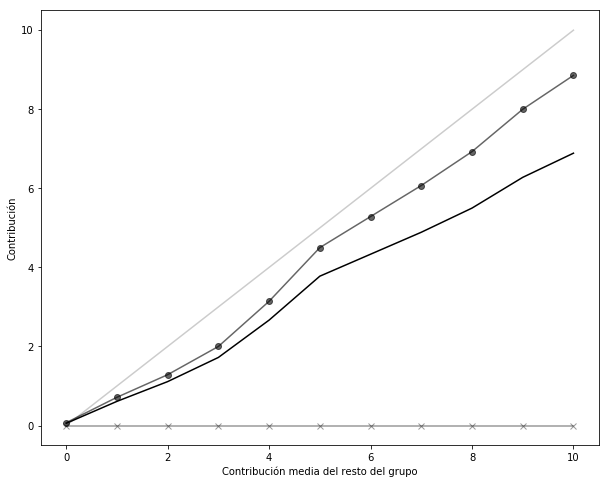

In [5]:
plt.figure(figsize=(10,8)) 
plt.plot(df_conditional[groups == 0].mean(), marker='o', color='black', alpha=0.6)
plt.plot(df_conditional[groups == 1].mean(), marker='x', color= 'black', alpha=0.4)
plt.plot(df_conditional.iloc[0], color='black', alpha =0.2)
plt.plot(df_conditional.mean(), color='black')
plt.ylabel('Contribución')
plt.xlabel('Contribución media del resto del grupo')

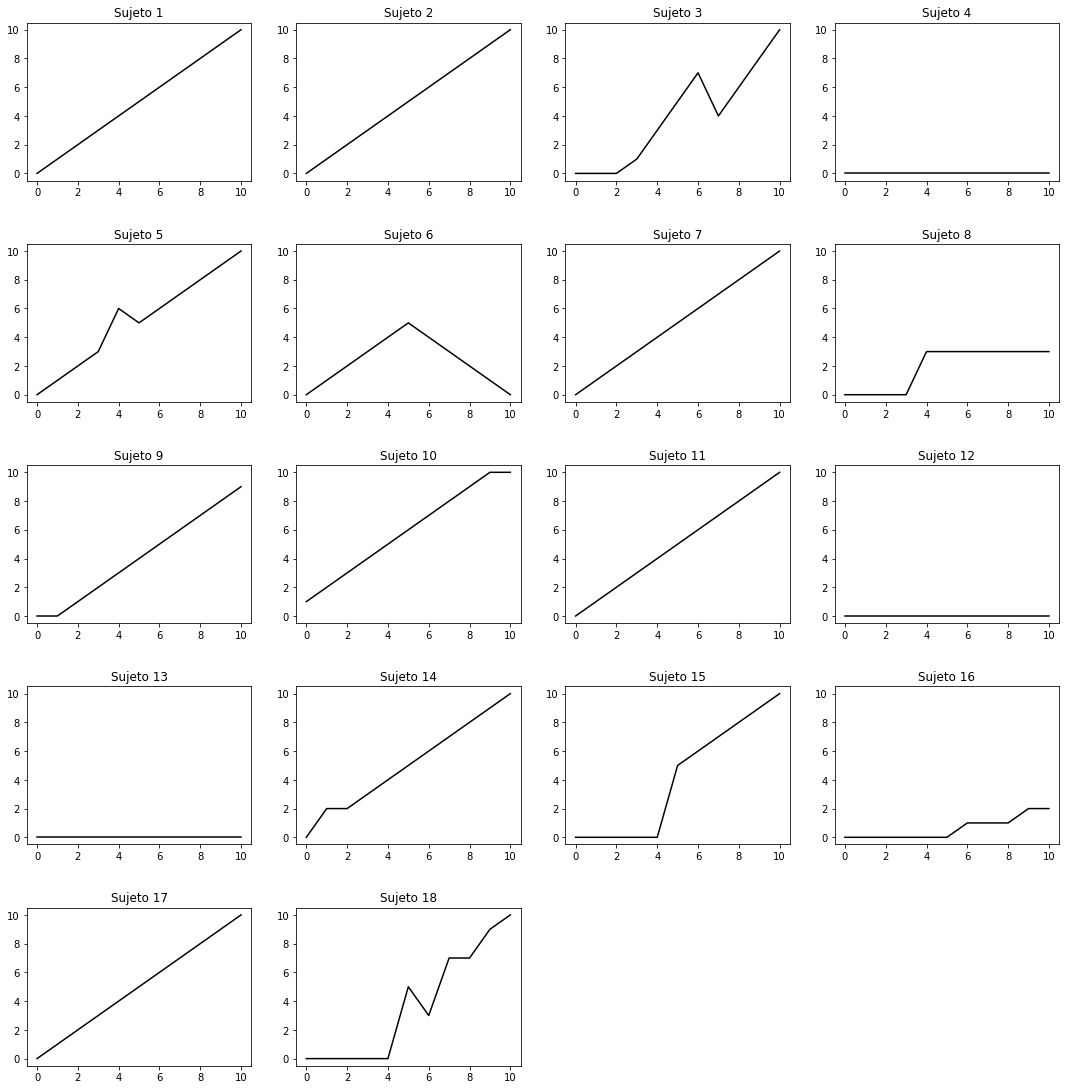

In [6]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
ax1 = plt.subplot(5,4,1)
plt.plot(df_conditional.iloc[0], color='black')
plt.title('Sujeto 1')
plt.subplots_adjust(bottom = -0.5, hspace = 0.4)

for i in range(1,18):
    plt.subplot(5,4,i+1, sharex=ax1, sharey=ax1)
    plt.plot(df_conditional.iloc[i], color='black')
    plt.title('Sujeto '+str(i+1))


In [7]:
groups = np.array([0,0,0,1,0,2,0,0,0,2,0,1,1,0,0,0,0,0])

In [8]:
team = np.random.randint(18, size=4)
team

array([16, 17,  1,  5])

In [9]:
t=0
for player in team:
    t+=df_start.iloc[player]
    
m = t/4 
m

3.75

In [10]:
t=0
a=int(m)
d=m-a
for player in team:
    t+= df_conditional.iloc[player][a]*(1-d) + df_conditional.iloc[player][a+1]*(d)
    
m = t/4
m

2.8125

In [28]:
import pandas as pd
import numpy as np

##JUEGO DE LAS PAREJAS

#en df_start tenemos la contribucion incondicional
#en df_conditional tenemos las contribuciones condicionales

#Especificar total de iteraciones
it_total = 100

#reseteo de variables
it = 0
conv_cuenta = 0
conv10_cuenta = 0

#Creacion de array para almacenar resultados
result = np.zeros([it_total*4, 20])

while it < it_total:
    
    #Reseteo convergencia
    conv = 0
    conv10 = 0
    
    #Creación del equipo
    team = np.random.randint(18, size=4)
    
    #Primera ronda tomamos contribución incondicional
    p=0
    for player in team:
        result[p+it*4,0] = df_start.iloc[player]
        p += 1
    
    #Rondas 2 a 20 tomatmos la contribución condicional interpolando
    for i in range(1,20):
        p=0
        for player in team:
            media = np.delete(result[it*4:it*4+4,i-1], p).mean()
            a=int(media)
            d=media-a
            
            y = df_conditional.iloc[player][a]*(1-d)
            z = df_conditional.iloc[player][min(10,a+1)]*(d)
            result[p+it*4,i] = y + z
            
            p +=1


        i += 1

        if media < 1:
            conv = 1
        if media > 9:
            conv10 = 1
    it += 1
    conv_cuenta += conv
    conv10_cuenta += conv10
    

#resultado
print('JUEGO DE LAS PAREJAS')
print('Convergencia a 0:',conv_cuenta)
print('Convergencia a 10:',conv10_cuenta)

JUEGO DE LAS PAREJAS
Convergencia a 0: 82
Convergencia a 10: 3


In [29]:
#JUEGO DE LOS EXTRAÑOS

#reseteo de variables
it = 0
conv_cuenta = 0
conv10_cuenta = 0

#Creacion de array para almacenar resultados
result2 = np.zeros([it_total*4, 20])

while it < it_total:
    
    #Reseteo convergencia
    conv = 0
    conv10 = 0
    
    #Creación del equipo
    team = np.random.randint(18, size=4)
    
    #Primera ronda tomamos contribución incondicional
    p=0
    for player in team:
        result2[p+it*4,0] = df_start.iloc[player]
        p += 1
    
    #Rondas 2 a 20 tomatmos la contribución condicional interpolando
    for i in range(1,20):
        p=0
        team = np.random.randint(18, size=4)
        for player in team:
            media = np.delete(result2[it*4:it*4+4,i-1], p).mean()
            a=int(media)
            d=media-a
            
            y = df_conditional.iloc[player][a]*(1-d)
            z = df_conditional.iloc[player][min(10,a+1)]*(d)
            result2[p+it*4,i] = y + z
            
            p +=1


        i += 1

        if media < 1:
            conv = 1
        if media > 9:
            conv10 = 1
    it += 1
    conv_cuenta += conv
    conv10_cuenta += conv10
    

#resultado
print('JUEGO DE LOS EXTRAÑOS')
print('Convergencia a 0:',conv_cuenta)
print('Convergencia a 10:',conv10_cuenta)

JUEGO DE LOS EXTRAÑOS
Convergencia a 0: 100
Convergencia a 10: 0


Text(0.5,0,'Ronda')

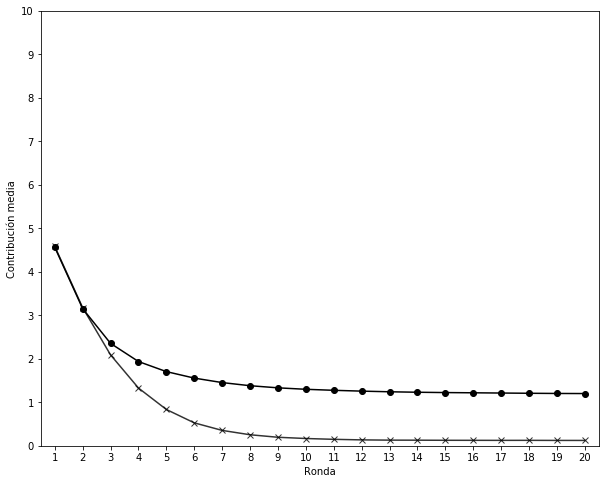

In [27]:
plt.figure(figsize=(10,8)) 
plt.plot(result.mean(axis=0), marker='o', color='black')
plt.plot(result2.mean(axis=0), marker='x', color='black', alpha=0.8)
plt.axis([-0.5, 19.5, 0, 10])
plt.xticks(np.arange(20), np.arange(1,21))
plt.yticks(np.arange(0, 11, step=1))
plt.ylabel('Contribución media')
plt.xlabel('Ronda')

In [17]:
result.std(axis=0).mean()

2.4992331001057115

In [21]:
result2.std(axis=0).mean()

0.822351516946387

Text(0.5,0,'Ronda')

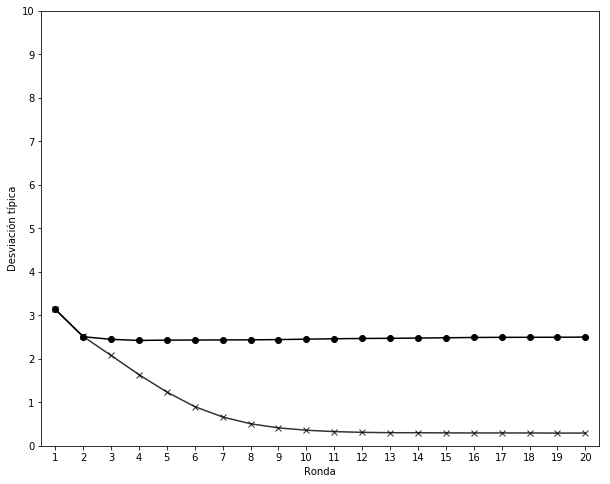

In [26]:
plt.figure(figsize=(10,8)) 
plt.plot(result.std(axis=0), marker='o', color='black')
plt.plot(result2.std(axis=0), marker='x', color='black', alpha=0.8)
plt.axis([-0.5, 19.5, 0, 5])
plt.xticks(np.arange(20), np.arange(1,21))
plt.yticks(np.arange(0, 11, step=1))
plt.ylabel('Desviación típica')
plt.xlabel('Ronda')

In [28]:
result.std(axis=0)

array([3.13769074, 2.50793527, 2.44847202, 2.42253508, 2.43024568,
       2.43243967, 2.43491804, 2.43645263, 2.44249628, 2.45196845,
       2.4618489 , 2.46761516, 2.47205813, 2.47750231, 2.48424396,
       2.49094081, 2.49420768, 2.49507561, 2.496177  , 2.49983858])

In [29]:
result2.std(axis=0)

array([3.13683461, 2.51338816, 2.07764089, 1.63628031, 1.23594257,
       0.90097719, 0.66229381, 0.50669013, 0.41242662, 0.35841521,
       0.3264527 , 0.30941979, 0.30120529, 0.30032154, 0.29718845,
       0.29551597, 0.29542458, 0.29528036, 0.29242743, 0.29290472])

In [32]:
result.mean(axis=0)

array([4.56555   , 3.15335   , 2.35463889, 1.93756111, 1.7059858 ,
       1.55659527, 1.45366036, 1.38167458, 1.33280123, 1.29931525,
       1.27605103, 1.25708817, 1.24233935, 1.231507  , 1.22404595,
       1.21881874, 1.21335627, 1.20787363, 1.20348936, 1.20131175])

In [33]:
result2.mean(axis=0)

array([4.584075  , 3.17529167, 2.09013889, 1.32820926, 0.8347858 ,
       0.52757716, 0.35384818, 0.25399717, 0.19610608, 0.16769757,
       0.14889368, 0.13610956, 0.13023517, 0.12913222, 0.12671103,
       0.12591564, 0.12508531, 0.12563543, 0.12374816, 0.1235029 ])

In [12]:
df_start[11:13] = 0

/home/bsanse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_start

0      8
1      6
2      5
3      0
4      7
5      4
6     10
7      4
8      4
9     10
10     5
11     0
12     0
13     7
14     5
15     2
16     0
17     5
Name: l, dtype: int64

(array([4., 0., 1., 0., 3., 4., 1., 2., 1., 0., 2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

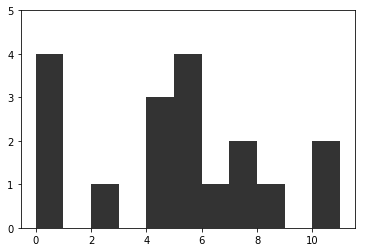

In [14]:
plt.axis(ymax=5)
plt.hist(df_start, color='black', alpha=0.8, bins=[0,1,2,3,4,5,6,7,8,9,10,11])

In [15]:
df_start

0      8
1      6
2      5
3      0
4      7
5      4
6     10
7      4
8      4
9     10
10     5
11     0
12     0
13     7
14     5
15     2
16     0
17     5
Name: l, dtype: int64

In [16]:
for i in range(0,18):
    print(pd.Series((range(0,11))).corr(df_conditional.iloc[i]))

1.0
1.0
0.9418581497197698
nan
0.9834450564746755
7.976077666195232e-18
1.0
0.8366600265340757
0.9966158955401238
0.9966158955401241
1.0
nan
nan
0.9962828440259088
0.9481224447363148
0.894427190999916
1.0
0.9341545492620179


In [17]:
from scipy import stats

In [18]:
for i in range(0,18):
     print(groups[i], stats.spearmanr(df_conditional.iloc[i], (range(0,11)))[0], stats.spearmanr(df_conditional.iloc[i], (range(0,11)))[1]<0.01)

/home/bsanse/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bsanse/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bsanse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/bsanse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/bsanse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


0 1.0 True
0 1.0 True
0 0.9449938984001263 True
1 nan False
0 0.9840572227689233 True
2 0.0 False
0 1.0 True
0 0.8366600265340756 True
0 0.9977246841962695 True
2 0.9977246841962695 True
0 1.0 True
1 nan False
1 nan False
0 0.9977246841962695 True
0 0.9534625892455922 True
0 0.9045340337332909 True
0 1.0 True
0 0.941517393511213 True


In [19]:
for i in range(0,18):
     print(stats.spearmanr(df_conditional.iloc[i], (range(0,11)))[1])

0.0
0.0
1.1606538715728084e-05
nan
4.666690957849578e-08
1.0
0.0
0.0013229505842674947
7.459103451013697e-12
7.459103451013697e-12
0.0
nan
nan
7.459103451013697e-12
5.537727791862358e-06
0.0001307033932935311
0.0
1.5214774186816707e-05


/home/bsanse/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bsanse/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bsanse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/bsanse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/bsanse/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
